## P3
Małgorzata Kurcjusz-Gzowska 


4/11/2025
Do poprawy P3.2 -> wolfram @@
i wtedy będzie dodatkowe 1.5P

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from collections import Counter
from mpmath import zeta
from scipy.stats import norm
from matplotlib.animation import FuncAnimation

#### Exercise 1. Draw a histogram with marked sigma intervals for random variables from the normal distribution.

In [3]:
np.random.seed(0)
data=np.random.randn(10000) # mean=0, std=1

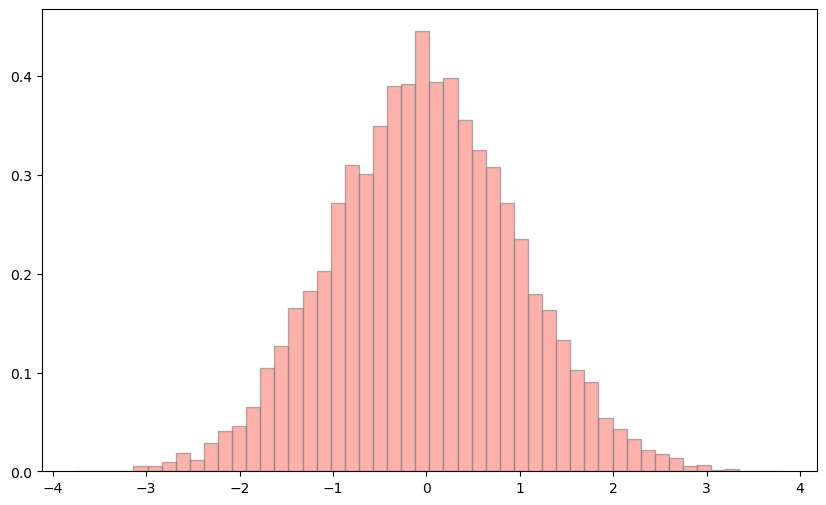

In [4]:
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(data, bins=50, density=True, alpha=0.6, color='salmon', edgecolor='gray')

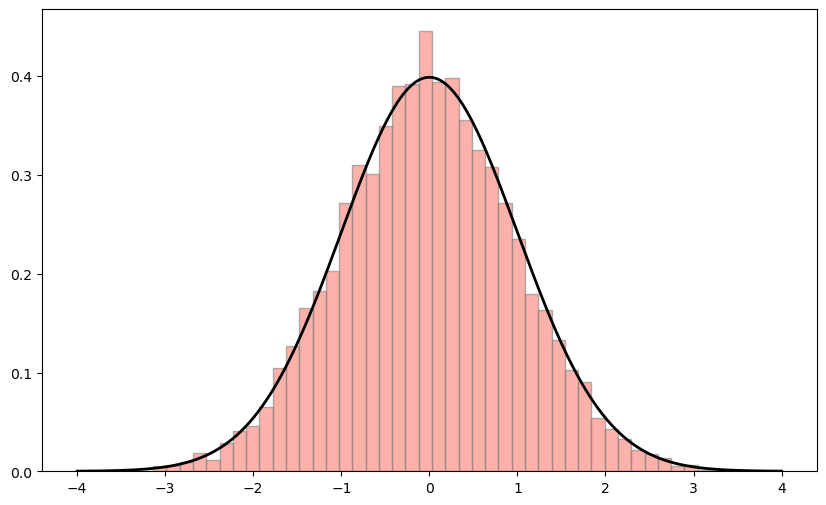

In [5]:
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(data, bins=50, density=True, alpha=0.6, color='salmon', edgecolor='gray')

# theoretical normal distribution curve
x = np.linspace(-4, 4, 1000)
plt.plot(x, norm.pdf(x, 0, 1), 'black', linewidth=2) # f(x) is probability density function (PDF) of the standard normal distribution

Text(0, 0.5, 'Density')

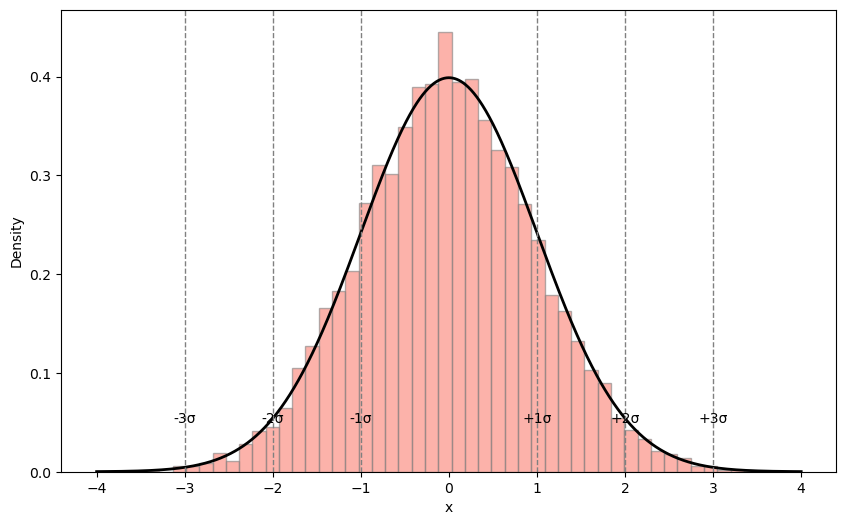

In [6]:
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(data, bins=50, density=True, alpha=0.6, color='salmon', edgecolor='gray')
# normal distribution curve
x = np.linspace(-4, 4, 1000)
plt.plot(x, norm.pdf(x, 0, 1), 'black', linewidth=2)

#sigma intervals
mu=0
sigma =1
for i in range(1, 4):
    plt.axvline(mu + i*sigma, color='gray', linestyle='--', linewidth=1)
    plt.axvline(mu - i*sigma, color='gray', linestyle='--', linewidth=1)
    plt.text(mu + i*sigma, 0.05, f'+{i}σ', ha='center')
    plt.text(mu - i*sigma, 0.05, f'-{i}σ', ha='center')

plt.xlabel('x')
plt.ylabel('Density')

#### Exercise 2. Check the Pareto rule for variables from the geometric distribution.

In [7]:
#parameters
p = 0.001
n = 100000

In [123]:
data = np.random.geometric(p, size=n)

In [124]:
# sorting values descending
sorted_data = np.sort(data)[::-1]
sorted_data

array([11795, 11138, 10676, ...,     1,     1,     1])

In [125]:
#compute cumulative share of total
cum_share = np.cumsum(sorted_data) / sorted_data.sum()
cum_share

array([1.17102558e-04, 2.27682320e-04, 3.33675275e-04, ...,
       9.99999980e-01, 9.99999990e-01, 1.00000000e+00])

In [126]:
#compute share of population (from 0 to 1)
pop_share = np.arange(1, n+1) / n
pop_share

array([1.0000e-05, 2.0000e-05, 3.0000e-05, ..., 9.9998e-01, 9.9999e-01,
       1.0000e+00])

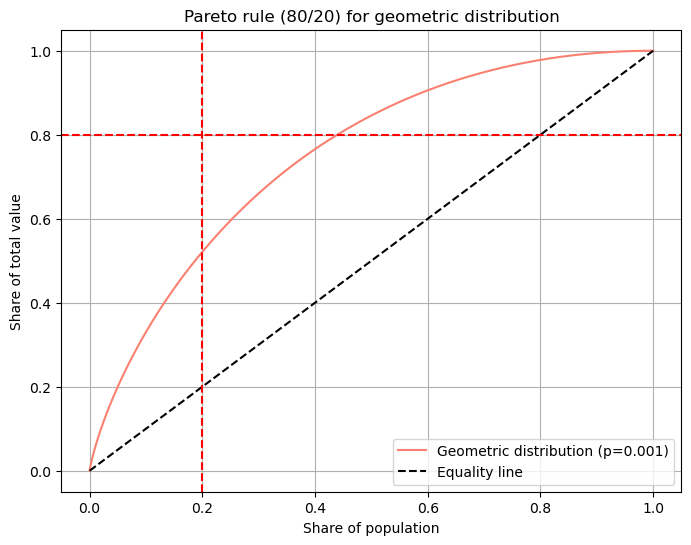

In [127]:
# Lorenz curve
plt.figure(figsize=(8, 6))
plt.plot(pop_share, cum_share, label=f'Geometric distribution (p={p})', color="salmon")
plt.plot([0, 1], [0, 1], 'k--', label='Equality line')

#  80/20 point
plt.axvline(0.2, color='r', linestyle='--')
plt.axhline(0.8, color='r', linestyle='--')
plt.title('Pareto rule (80/20) for geometric distribution')
plt.xlabel('Share of population')
plt.ylabel('Share of total value')
plt.legend()
plt.grid(True)
plt.show()

#### Example 3. Draw a histogram with marked sigm intervals for variables drawn from a continuous power distribution.

In [130]:
alpha = 3 # shape parameter (α > 2 for finite variance)
x_min = 1 # minimum value
n = 10000 # number of samples

In [131]:
#random samples: X = x_min * (1 + Pareto(alpha))
rng = np.random.default_rng(42)
samples = x_min * (1 + rng.pareto(alpha, size=n))

In [132]:
#mean and standard deviation
mu = samples.mean()
sigma = samples.std(ddof=0)

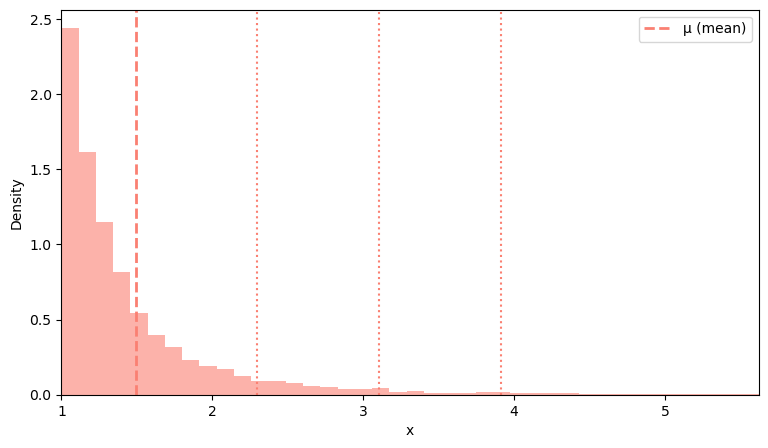

In [133]:
plt.figure(figsize=(9, 5))
plt.hist(samples, bins=200, density=True, alpha=0.6, color="salmon")

#plot mean and sigma intervals
plt.axvline(mu, color='salmon', linestyle='--', linewidth=2, label='μ (mean)')
for k in [1, 2, 3]:
    plt.axvline(mu - k * sigma, color='salmon', linestyle=':', linewidth=1.5)
    plt.axvline(mu + k * sigma, color='salmon', linestyle=':', linewidth=1.5)


plt.xlabel("x")
plt.ylabel("Density")
plt.xlim(x_min, np.quantile(samples, 0.995))  # limit right tail for better visibility - this line was written with help of chat gpt
plt.legend()
plt.show()

In [134]:
print(f"Mean μ = {mu:.3f}")
print(f"Standard deviation σ = {sigma:.3f}")

Mean μ = 1.492
Standard deviation σ = 0.807


#### Example 4. Check the Pareto rule for variables from the zeta distribution.

In [135]:
s = 0.9 # exponent of zeta distribution
n = 200000 # number of discrete values

In [136]:
# zeta distribution probabilities
k = np.arange(1, n + 1)
p = (1 / zeta(s)) * k ** (-s)
p = np.array(p, dtype=float)
p /= p.sum()  # normalize
p

array([4.08791516e-02, 2.19065949e-02, 1.52087228e-02, ...,
       6.92753592e-07, 6.92750474e-07, 6.92747357e-07])

In [137]:
k

array([     1,      2,      3, ..., 199998, 199999, 200000])

In [138]:
# values from smallest to largest (for Lorenz curve)
p_sorted = np.sort(p)
cum_p = np.cumsum(p_sorted) / np.sum(p_sorted)
cum_k = np.arange(1, n + 1) / n

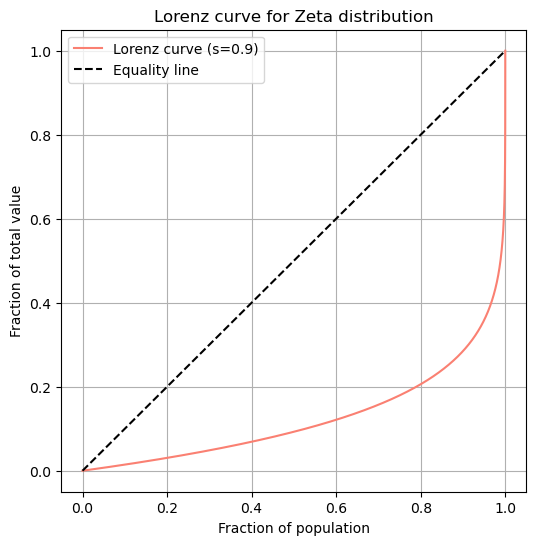

In [139]:
plt.figure(figsize=(6, 6))
plt.plot(cum_k, cum_p, label=f'Lorenz curve (s={s})',color="salmon")
plt.plot([0, 1], [0, 1], 'k--', label='Equality line')
plt.xlabel('Fraction of population')
plt.ylabel('Fraction of total value')
plt.title('Lorenz curve for Zeta distribution')
plt.legend()
plt.grid(True)
plt.show()

In [140]:
# what fraction of the largest values gives 80% of the total
p_desc = np.sort(p)[::-1]
cum_desc = np.cumsum(p_desc)
idx_80 = np.argmax(cum_desc >= 0.8)
share = (idx_80 + 1) / n

In [141]:
print(f"For s = {s}: top {share*100:.1f}% of values account for 80% of the total.")

For s = 0.9: top 21.0% of values account for 80% of the total.


#### Example 5. Empirical justification
- generate BA network and ER graphs using built-in functions.
- observe the presence of hubs.
- draw a vertex degree histogram.
- compute estimators of expectation and variance for vertex degrees.
- how are the two cases different?

In [142]:
n = 2000            # number of nodes
m = 3               # BA: number of edges to attach from a new node to existing nodes
target_avg_k = 2*m  # Expected average degree in BA is ~ 2m
p = target_avg_k / (n - 1)  # ER: choose p so E[degree] ~ target_avg_k

In [143]:
G_ba = nx.barabasi_albert_graph(n=n, m=m, seed=0)
G_er = nx.erdos_renyi_graph(n=n, p=p, seed=0, directed=False)

In [144]:
def degree_stats(G):
    # returns degrees as a numpy array and basic stats
    degs = np.fromiter((d for _, d in G.degree()), dtype=int)
    mean_k = float(np.mean(degs))
    var_k = float(np.var(degs, ddof=1))  # unbiased sample variance
    max_k = int(np.max(degs))
    q95 = float(np.quantile(degs, 0.95))
    return degs, mean_k, var_k, max_k, q95

deg_ba, mean_ba, var_ba, max_ba, q95_ba = degree_stats(G_ba)
deg_er, mean_er, var_er, max_er, q95_er = degree_stats(G_er)

In [145]:
print("=== Barabási–Albert (BA) ===")
print(f"n={n}, m={m} -> expected avg degree ≈ {2*m}")
print(f"Empirical mean degree:     {mean_ba:.3f}")
print(f"Empirical variance degree: {var_ba:.3f}")
print(f"Max degree (hub size):     {max_ba}")
print(f"95th percentile degree:    {q95_ba:.1f}")
print()

print("=== Erdős–Rényi (ER) ===")
print(f"n={n}, p={p:.5f} -> expected avg degree ≈ {target_avg_k:.1f}")
print(f"Empirical mean degree:     {mean_er:.3f}")
print(f"Empirical variance degree: {var_er:.3f}")
print(f"Max degree:                {max_er}")
print(f"95th percentile degree:    {q95_er:.1f}")
print()

=== Barabási–Albert (BA) ===
n=2000, m=3 -> expected avg degree ≈ 6
Empirical mean degree:     5.991
Empirical variance degree: 61.994
Max degree (hub size):     176
95th percentile degree:    15.0

=== Erdős–Rényi (ER) ===
n=2000, p=0.00300 -> expected avg degree ≈ 6.0
Empirical mean degree:     5.987
Empirical variance degree: 6.033
Max degree:                16
95th percentile degree:    10.0



In [146]:
ratio_max_to_mean_ba = max_ba / mean_ba
ratio_max_to_mean_er = max_er / mean_er
print("=== Comparison ===")
print(f"Max/Mean degree ratio BA: {ratio_max_to_mean_ba:.1f}")
print(f"Max/Mean degree ratio ER: {ratio_max_to_mean_er:.1f}")
print("Observation: BA typically shows hubs (large Max/Mean ratio) and a heavy tail; "
      "ER is much tighter around the mean with smaller extremes.")

=== Comparison ===
Max/Mean degree ratio BA: 29.4
Max/Mean degree ratio ER: 2.7
Observation: BA typically shows hubs (large Max/Mean ratio) and a heavy tail; ER is much tighter around the mean with smaller extremes.


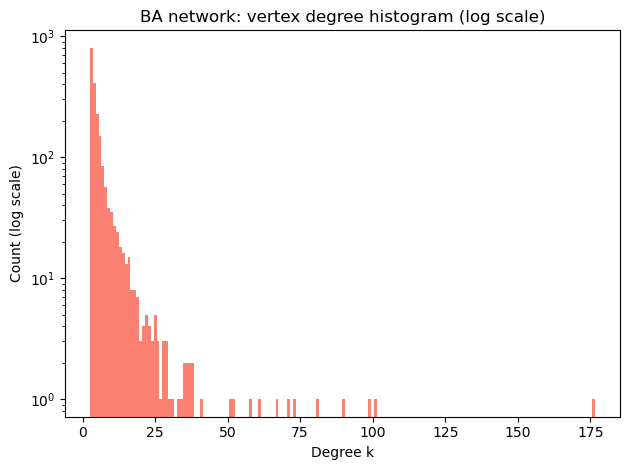

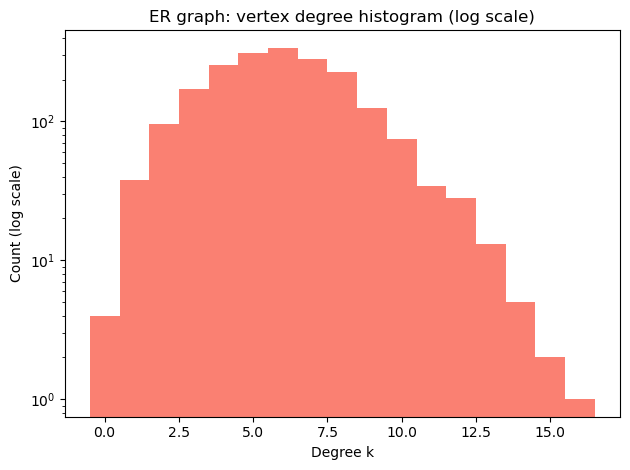

In [150]:
def plot_degree_hist(degrees, title):
    # use integer bins from min to max degree
    bins = np.arange(int(np.min(degrees)), int(np.max(degrees)) + 2) - 0.5
    plt.figure()
    plt.hist(degrees, bins=bins, color='salmon') 
    plt.yscale("log")  # log scale helps reveal heavy tails
    plt.xlabel("Degree k")
    plt.ylabel("Count (log scale)")
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_degree_hist(deg_ba, "BA network: vertex degree histogram (log scale)")
plot_degree_hist(deg_er, "ER graph: vertex degree histogram (log scale)")

## oba na w pełni liniowej

In [148]:
def top_k_hubs(G, k=10):
    # Return top-k nodes by degree
    return sorted(G.degree(), key=lambda x: x[1], reverse=True)[:k]

print("\nTop 10 BA hubs (node_id, degree):")
print(top_k_hubs(G_ba, 10))


Top 10 BA hubs (node_id, degree):
[(0, 176), (4, 101), (5, 99), (6, 90), (1, 81), (2, 73), (11, 71), (9, 67), (13, 61), (7, 58)]


#### P3.1 Read documentation of the pre-defined graph layout functions in your chosen environment. For the selected real graph, test several visualisation methods. [1.5P]

In [151]:
# in Wolfram

#### P3.2 Rewrite your code into functional form (applies to Wolfram language only). [1.5P]

In [8]:
# in Wolfram

# TO DO

#### P3.3 Implement the graph visualisation based on the spring method according to the specification below. [3P]

Physical approach
- in every vertex we put the same electric charge,
- every edge we replace with a spring,
- we start with the random configuration,
- forces by minimizing electrostatic energy and potential elasticity do the work for us.

Work plan (Python)
- write the energy of the spring system,
- draw the graph in some configuration.
- apply simulated annealing for finding optimal configuration.
- prepare animation.

In [164]:
N = 10 # number of nodes (energy is O(n^2))
G = nx.barabasi_albert_graph(N, m=2, seed=1)

In [165]:
k_repulsion = 1.0        # Coulomb repulsion coefficient
k_spring = 0.1           # Hooke spring coefficient
L0 = 0.2                 # natural spring length for each edge
box = 2.0                # drawing box size ([-box, box]^2)

T0 = 1.0                 # initial temperature
Tmin = 1e-3              # final temperature
cool = 0.98              # cooling factor per step
steps_per_T = 50         # inner steps per temperature value
step_sigma = 0.1         # size of random position proposals

In [166]:
# najpierw liczymy energię ze sprężyn na krawędziach
# potem liczymy odpychanie między wszystkimi parami wierzchołków
# 

def energy(G, pos):
    """
    Total potential energy:
      - Springs on edges: 0.5 * k_spring * (||x_i - x_j|| - L0)^2
      - Electrostatic repulsion on all pairs i<j: k_repulsion / ||x_i - x_j||
    """
    E = 0.0
    # Edge springs
    for i, j in G.edges():
        d = pos[i] - pos[j]
        r = np.linalg.norm(d) + 1e-12
        E += 0.5 * k_spring * (r - L0) ** 2

    # Coulomb repulsion (all pairs)
    nodes = list(G.nodes())
    P = pos[nodes]
    # naive O(n^2) loop for clarity
    for a in range(len(nodes)):
        for b in range(a + 1, len(nodes)):
            r = np.linalg.norm(P[a] - P[b]) + 1e-12 # żeby nie dzielić przez zero jeśli dwa wierzchołki dokładnie w tym samym miejscu
            E += k_repulsion / r
    return E # jak złe jest ułożenie wierzchołków


#kopiujemy aktualne pozycje
#losujemy indeks idx wierchołka, który przesunie
#dodaje do jego współrzędnych losowy wektor z rozkładu normalnego o odchyleniu step_sigma
# obcięcie współrzędnych, zeby wszystko zostało w kwadracie
# kandydat na nowa konfiguracje

def propose(pos):
    """Propose a new position by Gaussian perturbation; keep inside box."""
    new_pos = pos.copy()
    idx = np.random.randint(0, len(new_pos))         # move one random node
    new_pos[idx] = new_pos[idx] + np.random.randn(2) * step_sigma
    new_pos[idx] = np.clip(new_pos[idx], -box, box)  # soft bounding
    return new_pos


# startuje się z T=T10 i pozycj pos0
# best_E - najlepsza energia poczatkowa
# while T>Tmin w każdej iterazji wykonujemy kilka kroków i obniżamy temoeraturę
# 

def anneal(G, pos0, record_every=5):
    """
    Basic simulated annealing:
      - Accept downhill moves
      - Accept uphill with prob exp(-(ΔE)/T)
      - Geometric cooling schedule
    Returns:
      positions_list: snapshots for animation
      best_pos: best configuration found
    """
    T = T0
    pos = pos0.copy()
    E = energy(G, pos)
    best_pos = pos.copy()
    best_E = E

    snapshots = [pos.copy()]

    while T > Tmin:
        for _ in range(steps_per_T):
            cand = propose(pos)
            Ec = energy(G, cand)
            dE = Ec - E

            # tworzymy kandydata
            if dE <= 0 or np.random.rand() < np.exp(-dE / T):
                pos, E = cand, Ec
                if E < best_E:
                    best_E, best_pos = E, pos.copy()
        if len(snapshots) == 0 or (len(snapshots) % record_every == 0):
            snapshots.append(pos.copy())
        else:
            snapshots.append(pos.copy())
        T *= cool # obniżamy temp
    return snapshots, best_pos, best_E

In [167]:
# random initial positions in box
pos0 = np.random.uniform(-box, box, size=(G.number_of_nodes(), 2))
frames, best_pos, best_E = anneal(G, pos0, record_every=3)

print(f"Final best energy: {best_E:.4f}")

Final best energy: 20.5763


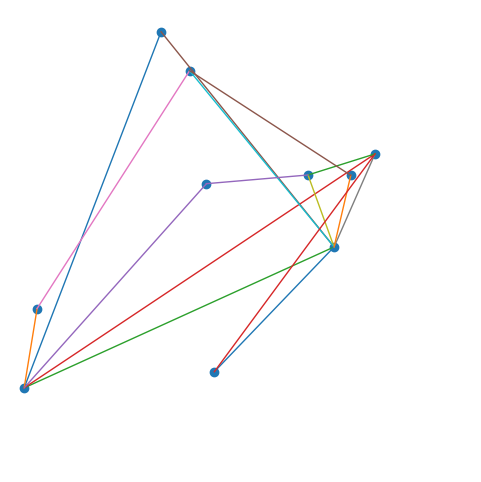

In [168]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect('equal')
ax.set_xlim(-box, box)
ax.set_ylim(-box, box)
ax.axis('off')

# pre-create artists for efficiency
edge_lines = []
for (i, j) in G.edges():
    line, = ax.plot([], [], lw=1)
    edge_lines.append((i, j, line))
node_scatter = ax.scatter([], [])

def init():
    # use the first frame as a valid Nx2 array for scatter
    P0 = frames[0]
    node_scatter.set_offsets(P0)
    for i, j, line in edge_lines:
        xy = np.vstack([P0[i], P0[j]]).T
        line.set_data(xy[0], xy[1])
    return [node_scatter] + [ln for _, _, ln in edge_lines]

def update(frame_idx):
    P = frames[frame_idx]
    # update nodes
    node_scatter.set_offsets(P)
    # update edges
    for i, j, line in edge_lines:
        xy = np.vstack([P[i], P[j]]).T
        line.set_data(xy[0], xy[1])
    ax.set_title(f"Spring layout – step {frame_idx+1}/{len(frames)}")
    return [node_scatter] + [ln for _, _, ln in edge_lines]

anim = FuncAnimation(
    fig, update, frames=len(frames), init_func=init,
    blit=True, interval=60, repeat=False
)

plt.show()

anim.save("spring_layout.gif", writer="pillow", fps=20)